In [1]:
import torch
import matplotlib.pyplot as plt
import os
os.getcwd()
import numpy as np
from datasets import Split_Dataset
from torchvision.datasets import ImageFolder
from torchvision import transforms

normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
val_transforms = transforms.Compose([
        transforms.Resize(224+32),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

val_ds = ImageFolder('/gpfs/u/locker/200/CADS/datasets/ImageNet/val', transform=val_transforms)
test_loader = torch.utils.data.DataLoader(
            val_ds, batch_size=256, shuffle=False,
            num_workers=20, pin_memory=True,
        )

In [2]:
from eval_metrics import load_1_model, get_metrics, rollout_loader
# eqR = load_1_model("ft_eqR_cos_lr0.003_bs256")
# eqR_out, eqR_tar = rollout_loader(eqR, test_loader)

eq69 = load_1_model("ft_eq69_cos_lr0.003_bs256")
eq69_out, same_tar = rollout_loader(eq69, test_loader)

eq42 = load_1_model("ft_eq42_cos_lr0.003_bs256")
eq42_out, _ = rollout_loader(eq42, test_loader)

eq31 = load_1_model("ft_eq31_cos_lr0.003_bs256")
eq31_out, _ = rollout_loader(eq31, test_loader)

eq24 = load_1_model("ft_eq24_cos_lr0.003_bs256")
eq24_out, _ = rollout_loader(eq24, test_loader)

# baseR = load_1_model("ft_baseR_cos_lr0.003_bs256")
# baseR_out, baseR_tar = rollout_loader(baseR, test_loader)

base31 = load_1_model("ft_base31_cos_lr0.003_bs256")
base31_out, _ = rollout_loader(base31, test_loader)

base24 = load_1_model("ft_base24_cos_lr0.003_bs256")
base24_out, _ = rollout_loader(base24, test_loader)

base69 = load_1_model("ft_base69_cos_lr0.003_bs256")
base69_out, _ = rollout_loader(base69, test_loader)

inv = load_1_model("ft_inv_cos_lr0.003_bs256")
inv_out, _ = rollout_loader(inv, test_loader)

inv31 = load_1_model("ft_inv31_cos_lr0.004_bs256")
inv31_out, _ = rollout_loader(inv31, test_loader)

inv24 = load_1_model("ft_inv24_cos_lr0.004_bs256")
inv24_out, _ = rollout_loader(inv24, test_loader)

inv69 = load_1_model("ft_inv69_cos_lr0.004_bs256")
inv69_out, _ = rollout_loader(inv69, test_loader)

loaded ft_eq69_cos_lr0.003_bs256
loaded ft_eq42_cos_lr0.003_bs256
loaded ft_eq31_cos_lr0.003_bs256
loaded ft_eq24_cos_lr0.003_bs256
loaded ft_base31_cos_lr0.003_bs256
loaded ft_base24_cos_lr0.003_bs256
loaded ft_base69_cos_lr0.003_bs256
loaded ft_inv_cos_lr0.003_bs256
loaded ft_inv31_cos_lr0.004_bs256
loaded ft_inv24_cos_lr0.004_bs256
loaded ft_inv69_cos_lr0.004_bs256


In [3]:
num_classes = 1000
_,_,_,acc_pc_eq69 = get_metrics([eq69_out], [same_tar],['eq69'], num_classes=num_classes)
_,_,_,acc_pc_eq42 = get_metrics([eq42_out], [same_tar],['eq42'], num_classes=num_classes)
_,_,_,acc_pc_eq31 = get_metrics([eq31_out], [same_tar],['eq31'], num_classes=num_classes)
_,_,_,acc_pc_eq24 = get_metrics([eq24_out], [same_tar],['eq24'], num_classes=num_classes)
_,_,_,acc_pc_b31 = get_metrics([base31_out], [same_tar],['b31'], num_classes=num_classes)
_,_,_,acc_pc_b24 = get_metrics([base24_out], [same_tar],['b24'], num_classes=num_classes)
_,_,_,acc_pc_b69 = get_metrics([base69_out], [same_tar],['b69'], num_classes=num_classes)

_,_,_,acc_pc_inv = get_metrics([inv_out], [same_tar],['inv'], num_classes=num_classes)
_,_,_,acc_pc_i24 = get_metrics([inv24_out], [same_tar],['i24'], num_classes=num_classes)
_,_,_,acc_pc_i31 = get_metrics([inv31_out], [same_tar],['i31'], num_classes=num_classes)
_,_,_,acc_pc_i69 = get_metrics([inv69_out], [same_tar],['i69'], num_classes=num_classes)

bei_out = (eq42_out.softmax(-1) + base31_out.softmax(-1) + inv_out.softmax(-1))/3
_,_,_,acc_pc_bei = get_metrics([bei_out],[same_tar],[f'BEI'], input_softmax=True, num_classes=num_classes)

eee_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + eq31_out.softmax(-1))/3
_,_,_,acc_pc_eee = get_metrics([eee_out],[same_tar],[f'EEE'], input_softmax=True, num_classes=num_classes)

eeee_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + eq31_out.softmax(-1) + eq24_out.softmax(-1))/4
_,_,_,acc_pc_eeee = get_metrics([eeee_out],[same_tar],[f'EEEE'], input_softmax=True, num_classes=num_classes)

eiei_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + inv_out.softmax(-1) + inv24_out.softmax(-1))/4
_,_,_,acc_pc_eiei = get_metrics([eiei_out],[same_tar],[f'EEII'], input_softmax=True, num_classes=num_classes)

eebi_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + inv_out.softmax(-1) + base31_out.softmax(-1))/4
_,_,_,acc_pc_eebi = get_metrics([eebi_out],[same_tar],[f'EEBI'], input_softmax=True, num_classes=num_classes)


eq69
NLL: 0.9093856811523438 | ECE: 0.033749116531610494
Acc: 0.7688199877738953
eq42
NLL: 0.9061233401298523 | ECE: 0.030388223373964407
Acc: 0.7691799998283386
eq31
NLL: 0.9056292772293091 | ECE: 0.03064080397954215
Acc: 0.7682399749755859
eq24
NLL: 0.9061529040336609 | ECE: 0.03489678953457627
Acc: 0.7687000036239624
b31
NLL: 0.9237775206565857 | ECE: 0.03522903372485192
Acc: 0.7649199962615967
b24
NLL: 0.9240396022796631 | ECE: 0.03593387361943723
Acc: 0.7640799880027771
b69
NLL: 0.9307573437690735 | ECE: 0.03674560508206489
Acc: 0.7646600008010864
inv
NLL: 0.9599096179008484 | ECE: 0.03850943553138525
Acc: 0.7601400017738342
i24
NLL: 0.9637317061424255 | ECE: 0.04837276127699763
Acc: 0.7591599822044373
i31
NLL: 0.9739280343055725 | ECE: 0.049294076371714485
Acc: 0.7590399980545044
i69
NLL: 0.9665408730506897 | ECE: 0.0469485394675657
Acc: 0.7595199942588806
BEI
NLL: 0.8212129473686218 | ECE: 0.02187783063005652
Acc: 0.7878599762916565
EEE
NLL: 0.8179500102996826 | ECE: 0.017891318

In [27]:
num_classes= 1000
all_eq = [eq42_out,eq69_out,eq31_out,eq24_out]
all_inv = [inv_out,inv69_out,inv31_out,inv24_out]


ei_out = (eq42_out.softmax(-1) + inv_out.softmax(-1))/2
_,_,_,acc_pc_ei = get_metrics([ei_out],[same_tar],[f'EI'], input_softmax=True, num_classes=num_classes)

ee_out = (eq24_out.softmax(-1) + eq69_out.softmax(-1))/2
_,_,_,acc_pc_ee = get_metrics([ee_out],[same_tar],[f'EE'], input_softmax=True, num_classes=num_classes)

eei_out = (eq69_out.softmax(-1) + eq31_out.softmax(-1) + inv_out.softmax(-1))/3
_,_,_,acc_pc_eei = get_metrics([eei_out],[same_tar],[f'EEI'], input_softmax=True, num_classes=num_classes)

eee_out = (eq24_out.softmax(-1) + eq31_out.softmax(-1) + eq69_out.softmax(-1))/3
_,_,_,acc_pc_eee = get_metrics([eee_out],[same_tar],[f'EEE'], input_softmax=True, num_classes=num_classes)
acc_eis = []
acc_ees = []
for i in range(10):
    [eq1] = np.random.choice(all_eq, 1)
    [inv1] = np.random.choice(all_inv, 1)
    ei_out = (eq1.softmax(-1) + inv1.softmax(-1))/2
    _,_,acc_ei,acc_pc_ei = get_metrics([ei_out],[same_tar],[f'EI{i}'], input_softmax=True, num_classes=num_classes)
    
    [eq1, eq2] = np.random.choice(all_eq, 2, replace=False)
    ee_out = (eq1.softmax(-1) + eq2.softmax(-1))/2
    _,_,acc_ee,acc_pc_ee = get_metrics([ee_out],[same_tar],[f'EE{i}'], input_softmax=True, num_classes=num_classes)
    
    acc_eis.append(acc_ei)
    acc_ees.append(acc_ee) 
print(np.mean(acc_eis), np.std(acc_eis))
print(np.mean(acc_ees), np.std(acc_ees))

EI
NLL: 0.8463336825370789 | ECE: 0.01730778009951115
Acc: 0.7827799916267395
EE
NLL: 0.8410640358924866 | ECE: 0.013676686727013408
Acc: 0.7821599841117859
EEI
NLL: 0.819207489490509 | ECE: 0.02186150231322274
Acc: 0.7888999581336975
EEE
NLL: 0.8173603415489197 | ECE: 0.01749369354894385
Acc: 0.7887399792671204
EI0
NLL: 0.8443371653556824 | ECE: 0.014845923651047036
Acc: 0.7827799916267395
EE0
NLL: 0.8391950726509094 | ECE: 0.012845204263515798
Acc: 0.7826600074768066
EI1
NLL: 0.8476244807243347 | ECE: 0.015789582706931968
Acc: 0.7833799719810486
EE1
NLL: 0.8387073278427124 | ECE: 0.01334116203330459
Acc: 0.782759964466095
EI2
NLL: 0.8448268175125122 | ECE: 0.014168109535686705
Acc: 0.7822799682617188
EE2
NLL: 0.8405658602714539 | ECE: 0.014618496244959556
Acc: 0.7826399803161621
EI3
NLL: 0.8458706736564636 | ECE: 0.014153826394230126
Acc: 0.7830199599266052
EE3
NLL: 0.8387073278427124 | ECE: 0.01334116203330459
Acc: 0.782759964466095
EI4
NLL: 0.8437356352806091 | ECE: 0.0128877460039

In [38]:
acc_eis = []
acc_ees = []
for i in range(10):
    [eq1, eq2] = np.random.choice(all_eq, 2, replace=False) 
    [inv1] = np.random.choice(all_inv, 1)
    ei_out = (eq1.softmax(-1) + eq2.softmax(-1) + inv1.softmax(-1))/3
    _,_,acc_ei,acc_pc_ei = get_metrics([ei_out],[same_tar],[f'EEI{i}'], input_softmax=True, num_classes=num_classes)
    
    [eq1, eq2, eq3] = np.random.choice(all_eq, 3, replace=False)
    ee_out = (eq1.softmax(-1) + eq2.softmax(-1) + eq3.softmax(-1))/3
    _,_,acc_ee,acc_pc_ee = get_metrics([ee_out],[same_tar],[f'EEE{i}'], input_softmax=True, num_classes=num_classes)
    
    acc_eis.append(acc_ei)
    acc_ees.append(acc_ee) 
print(np.mean(acc_eis), np.std(acc_eis))
print(np.mean(acc_ees), np.std(acc_ees))

EEI0
NLL: 0.8158746361732483 | ECE: 0.019512810012511886
Acc: 0.7888000011444092
EEE0
NLL: 0.8166974186897278 | ECE: 0.017405910305045562
Acc: 0.7882799506187439
EEI1
NLL: 0.8145430684089661 | ECE: 0.020168474251497554
Acc: 0.7892999649047852
EEE1
NLL: 0.8166974186897278 | ECE: 0.017405910305045562
Acc: 0.7882799506187439
EEI2
NLL: 0.8163682818412781 | ECE: 0.01935286596795545
Acc: 0.7885199785232544
EEE2
NLL: 0.8169083595275879 | ECE: 0.015861198814753473
Acc: 0.7866799831390381
EEI3
NLL: 0.8152820467948914 | ECE: 0.018339181171804702
Acc: 0.7885199785232544
EEE3
NLL: 0.8173603415489197 | ECE: 0.017493693747501832
Acc: 0.7887399792671204
EEI4
NLL: 0.8150249123573303 | ECE: 0.020031380054056625
Acc: 0.7883599996566772
EEE4
NLL: 0.8173603415489197 | ECE: 0.01749369354894385
Acc: 0.7887399792671204
EEI5
NLL: 0.8146600723266602 | ECE: 0.02019407873949037
Acc: 0.7882799506187439
EEE5
NLL: 0.8169081807136536 | ECE: 0.015861198693104095
Acc: 0.7866799831390381
EEI6
NLL: 0.8163682818412781 | 

In [ ]:
0.7886119842529297 0.000561155375492722
0.7875099837779999 0.0005859118520821883

In [23]:
# import torch
# from torch.distributions import Categorical
import numpy as np

# p_tensor = acc_pc_bei
# entropy2 = Categorical(probs = p_tensor).entropy()
# print(entropy2)


p = acc_pc_bei.cpu().numpy()
logp = np.log(p)
entropy1 = np.sum(-p*logp)
print(entropy1)

p = acc_pc_eee.cpu().numpy()
logp = np.log(p)
entropy1 = np.sum(-p*logp)
print(entropy1)

171.39035
171.20023


In [4]:
num_classes=1000
print("base:", acc_pc_b31.sum().item()/(num_classes/100))
print("Rot eq:", acc_pc_eq69.sum().item()/(num_classes/100))
print("Rot inv:", acc_pc_inv.sum().item()/(num_classes/100))
print("BEI:", acc_pc_bei.sum().item()/(num_classes/100))

base: 76.49200439453125
Rot eq: 76.88199462890626
Rot inv: 76.01400146484374
BEI: 78.78599853515625


In [13]:
acc_pc_base = acc_pc_b31.cpu()
acc_pc_eq = acc_pc_eq42.cpu()
acc_pc_inv = acc_pc_inv.cpu()
acc_pc_bei = acc_pc_bei.cpu()

bei_better = 0
bei_worse = 0
bei_equal = 0
better_delta = 0.
worse_delta = 0.
for i in range(1000):
    best_single = max(acc_pc_base[i],acc_pc_eq[i],acc_pc_inv[i])
    if acc_pc_bei[i] < best_single:
        bei_worse += 1
        worse_delta += best_single - acc_pc_bei[i]
    elif acc_pc_bei[i] > best_single:
        bei_better += 1   
        better_delta += acc_pc_bei[i] - best_single
    else:
        bei_equal += 1
print(f"BEI better than best model: {bei_better}% | Avg delta: {better_delta/bei_better}")
if bei_worse != 0:
    print(f"BEI worse than best model: {bei_worse}% | Avg delta: {worse_delta/bei_worse}")
print(f"BEI equal to best model: {bei_equal}%")

BEI better than best model: 266% | Avg delta: 0.02857140451669693
BEI worse than best model: 399% | Avg delta: 0.035137880593538284
BEI equal to best model: 335%


In [9]:
num_classes=1000
print("base:", acc_pc_base.sum().item()/(num_classes/100))
print("Rot eq:", acc_pc_eq.sum().item()/(num_classes/100))
print("Rot inv:", acc_pc_inv.sum().item()/(num_classes/100))
print("BEI:", acc_pc_bei.sum().item()/(num_classes/100))

base: 76.49200439453125
Rot eq: 76.91799926757812
Rot inv: 76.01400146484374
BEI: 78.78599853515625


In [9]:
y = torch.stack([acc_pc_base, acc_pc_inv, acc_pc_eq], dim=-1)

num_classes = 1000
fac = num_classes/100
# all 3 models equally good
best_base_inv_eq = (y[:,0] == y[:,1]) & (y[:,1] == y[:,2])
# 2 models equally good and is better
best_base_inv = (y[:,0] == y[:,1]) & (y[:,0] > y[:,2])
best_base_eq = (y[:,0] == y[:,2]) & (y[:,0] > y[:,1])
best_inv_eq = (y[:,1] == y[:,2]) & (y[:,1] > y[:,0])
# 2 models equally good and is worse
worse_base_inv = (y[:,0] == y[:,1]) & (y[:,0] < y[:,2]) # best eq
worse_base_eq = (y[:,0] == y[:,2]) & (y[:,0] < y[:,1]) # best inv
worse_inv_eq = (y[:,1] == y[:,2]) & (y[:,1] < y[:,0]) # best base
all_diff = (y[:,0] != y[:,1]) & (y[:,1] != y[:,2]) & (y[:,0] != y[:,2])

delta_BI = (y[best_base_inv].max(dim=1)[0] - y[best_base_inv].min(dim=1)[0]).mean()
delta_BE = (y[best_base_eq].max(dim=1)[0] - y[best_base_eq].min(dim=1)[0]).mean()
delta_EI = (y[best_inv_eq].max(dim=1)[0] - y[best_inv_eq].min(dim=1)[0]).mean()

print(f"all equal best: {(best_base_inv_eq.sum())/fac:.1f}% ")
print(f"B,I equal best: {(best_base_inv.sum())/fac:.1f}% | delta acc = {delta_BI*100:.1f}")
print(f"B,E equal best: {(best_base_eq.sum())/fac:.1f}% | delta acc = {delta_BE*100:.1f}")
print(f"I,E equal best: {(best_inv_eq.sum())/fac:.1f}% | delta acc = {delta_EI*100:.1f}")
# print(f"all diff: {all_diff.sum()}")
total = best_base_inv_eq.sum() + best_base_inv.sum() + best_base_eq.sum() + best_inv_eq.sum() + all_diff.sum() + worse_inv_eq.sum() + worse_base_eq.sum() + worse_base_inv.sum()
assert total == num_classes

# for all diff 
best_base = (y[:,0] > y[:,1]) & (y[:,0] > y[:,2]) & all_diff
best_inv = (y[:,1] > y[:,0]) & (y[:,1] > y[:,2]) & all_diff
best_eq = (y[:,2] > y[:,0]) & (y[:,2] > y[:,1]) & all_diff
total_unique = best_base.sum()+best_inv.sum()+best_eq.sum()
assert total_unique == all_diff.sum()

# single model uniquely best
b_uniq = best_base | worse_inv_eq
i_uniq = best_inv | worse_base_eq
e_uniq = best_eq | worse_base_inv

delta_B = (y[b_uniq].topk(2,dim=1)[0].max(dim=1)[0] - y[b_uniq].topk(2,dim=1)[0].min(dim=1)[0]).mean()
delta_I = (y[i_uniq].topk(2,dim=1)[0].max(dim=1)[0] - y[i_uniq].topk(2,dim=1)[0].min(dim=1)[0]).mean()
delta_E = (y[e_uniq].topk(2,dim=1)[0].max(dim=1)[0] - y[e_uniq].topk(2,dim=1)[0].min(dim=1)[0]).mean()

print(f"B uniquely best: {b_uniq.sum()/fac:.1f}% | delta to next best= {delta_B*100:.1f}")
print(f"I uniquely best: {(best_inv.sum() + worse_base_eq.sum())/fac:.1f}% | delta to next best= {delta_I*100:.1f}")
print(f"E uniquely best: {(best_eq.sum() + worse_base_inv.sum())/fac:.1f}% | delta to next best= {delta_E*100:.1f}")

B_good = b_uniq | best_base_inv_eq | best_base_inv | best_base_eq
I_good = i_uniq | best_base_inv_eq | best_base_inv | best_inv_eq
E_good = e_uniq | best_base_inv_eq | best_base_eq | best_inv_eq




all equal best: 5.5% 
B,I equal best: 6.1% | delta acc = 3.3
B,E equal best: 7.9% | delta acc = 4.9
I,E equal best: 6.2% | delta acc = 4.0
B uniquely best: 24.1% | delta to next best= 3.7
I uniquely best: 21.5% | delta to next best= 4.2
E uniquely best: 28.7% | delta to next best= 3.9


In [88]:
from imagenet_stubs.imagenet_2012_labels import label_to_name


import numpy as np
y = torch.stack([acc_pc_inv, acc_pc_base, acc_pc_eq], dim=-1)
x = np.arange(1000)

idxs = np.split(x, 50)
for i in range(len(idxs)):
    ax = plt.subplot(111)
    xticks = np.arange(min(idxs[i]), max(idxs[i])+1, 1.0)
    ax.set_xticks(xticks)
    xticks = [f'{j}: {label_to_name(j)}' for j in xticks]
    ax.bar(idxs[i]-0.2, y[idxs[i],0], width=0.2, color='b', align='center', label='baseline')
    ax.bar(idxs[i], y[idxs[i],1], width=0.2, color='g', align='center', label='rotinv')
    ax.bar(idxs[i]+0.2, y[idxs[i],2], width=0.2, color='r', align='center', label='roteq')
    # Set number of ticks for x-axis
    # ax.set_xticks(xticks)
    # Set ticks labels for x-axis
    ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=5)
    plt.legend(loc='upper right')
    plt.tight_layout()
#     plt.savefig(f'acc_per_class{i}.png')
    plt.figure().clear()

RuntimeError: All input tensors must be on the same device. Received cpu and cuda:0

In [100]:
acc_pc_base = acc_pc_b31.cpu()
acc_pc_eq = acc_pc_eq69.cpu()
acc_pc_inv = acc_pc_inv.cpu()
acc_pc_bei = acc_pc_bei.cpu()
y = torch.stack([acc_pc_inv, acc_pc_base, acc_pc_eq], dim=-1)*100

ystd = torch.std(y,dim=-1)
val, ind = torch.sort(ystd, descending=True)



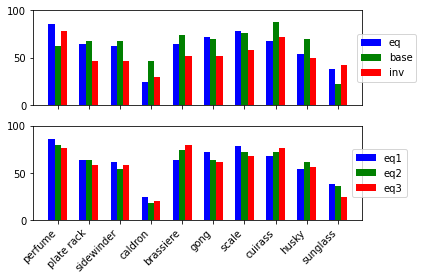

In [102]:
from imagenet_stubs.imagenet_2012_labels import label_to_name
s_labs = ['perfume', 'plate rack', 'sidewinder', 'caldron', 'brassiere', 'gong', 'scale', 'cuirass', 'husky', 'sunglass']

sind = ind.numpy()[:10]
idxs = np.arange(len(sind))
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(211)
ax.set_xticks(idxs)
xticks = [f'{j}: {label_to_name(j)}' for j in sind]
ax.bar(idxs-0.2, y[sind,2], width=0.2, color='b', align='center', label='eq')
ax.bar(idxs, y[sind,1], width=0.2, color='g', align='center', label='base')
ax.bar(idxs+0.2, y[sind,0], width=0.2, color='r', align='center', label='inv')
# Set number of ticks for x-axis
# ax.set_xticks(xticks)
# Set ticks labels for x-axis
# ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=8)
plt.legend(loc='right',bbox_to_anchor=(1.18, 0.5))
plt.tight_layout()
plt.ylim((0,100))
ax.set_yticks(np.linspace(0,100,3))
ax.set_xticklabels([])


#     plt.savefig(f'acc_per_class{i}.png')
# plt.figure().clear()

acc_pc_eq = acc_pc_eq42.cpu()
acc_pc_eq2 = acc_pc_eq31.cpu()
acc_pc_eq3 = acc_pc_eq24.cpu()
acc_pc_eq4 = acc_pc_eq69.cpu()
y2 = torch.stack([acc_pc_eq4, acc_pc_eq3, acc_pc_eq2], dim=-1)*100

ax = plt.subplot(212)
ax.set_xticks(idxs)
# xticks = [f'{j}: {label_to_name(j)}' for j in sind]
xticks = s_labs
ax.bar(idxs-0.2, y2[sind,0], width=0.2, color='b', align='center', label='eq1')
ax.bar(idxs, y2[sind,1], width=0.2, color='g', align='center', label='eq2')
ax.bar(idxs+0.2, y2[sind,2], width=0.2, color='r', align='center', label='eq3')
# Set number of ticks for x-axis
# ax.set_xticks(xticks)
# Set ticks labels for x-axis
ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=10)
ax.set_yticks(np.linspace(0,100,3))

plt.legend(loc='right',bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.ylim((0,100))
#     plt.savefig(f'acc_per_class{i}.png')
plt.savefig('bei_vs_eee_selected_bars.png')

# acc_pc_b = acc_pc_b31.cpu()
# acc_pc_b2 = acc_pc_b24.cpu()
# acc_pc_b3 = acc_pc_b69.cpu()
# y3 = torch.stack([acc_pc_b, acc_pc_b2, acc_pc_b3], dim=-1)

# ax = plt.subplot(212)
# ax.set_xticks(idxs)
# # xticks = [f'{j}: {label_to_name(j)}' for j in sind]
# xticks = s_labs
# ax.bar(idxs-0.2, y3[sind,0], width=0.2, color='b', align='center', label='eq1')
# ax.bar(idxs, y3[sind,1], width=0.2, color='g', align='center', label='eq2')
# ax.bar(idxs+0.2, y3[sind,2], width=0.2, color='r', align='center', label='eq3')
# # Set number of ticks for x-axis
# # ax.set_xticks(xticks)
# # Set ticks labels for x-axis
# ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=10)
# ax.set_yticks(np.linspace(0,1,3))

# plt.legend(loc='right',bbox_to_anchor=(1.15, 0.5))
# plt.tight_layout()
# plt.ylim((0,1.0))
# #     plt.savefig(f'acc_per_class{i}.png')
# plt.figure().clear()

In [91]:
[f'{j}: {label_to_name(j)}' for j in sind]

['711: perfume, essence',
 '729: plate rack',
 '68: sidewinder, horned rattlesnake, Crotalus cerastes',
 '469: caldron, cauldron',
 '459: brassiere, bra, bandeau',
 '577: gong, tam-tam',
 '778: scale, weighing machine',
 '524: cuirass',
 '248: Eskimo dog, husky',
 '836: sunglass']

In [92]:
s_labs = ['perfume', 'plate rack', 'sidewinder', 'caldron', 'brassiere', 'gong', 'scale', 'cuirass', 'husky', 'sunglass']

In [104]:
e_out = eq42_out.softmax(-1)
ee_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1))/2
eee_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + eq31_out.softmax(-1))/3
eeee_out = (eq42_out.softmax(-1) + eq69_out.softmax(-1) + eq31_out.softmax(-1) + eq24_out.softmax(-1))/4

_,_,_,acc_pc_e = get_metrics([e_out],[same_tar],[f'E'], input_softmax=True, num_classes=num_classes)
_,_,_,acc_pc_ee = get_metrics([ee_out],[same_tar],[f'EE'], input_softmax=True, num_classes=num_classes)
_,_,_,acc_pc_eee = get_metrics([eee_out],[same_tar],[f'EEE'], input_softmax=True, num_classes=num_classes)
_,_,_,acc_pc_eeee = get_metrics([eeee_out],[same_tar],[f'EEEE'], input_softmax=True, num_classes=num_classes)

y = torch.stack([acc_pc_inv, acc_pc_base, acc_pc_eq], dim=-1)*100

ystd = torch.std(y,dim=-1)
val, ind = torch.sort(ystd, descending=True)

yE = torch.stack([acc_pc_e, acc_pc_ee, acc_pc_eee, acc_pc_eeee], dim=-1)*100

yEstd = torch.std(yE,dim=-1)
valE, indE = torch.sort(yEstd, descending=False)


E
NLL: 0.9061233401298523 | ECE: 0.030388223373964407
Acc: 0.7691799998283386
EE
NLL: 0.840264081954956 | ECE: 0.01419719003710894
Acc: 0.782759964466095
EEE
NLL: 0.8179500102996826 | ECE: 0.017891318057477436
Acc: 0.7876999974250793
EEEE
NLL: 0.8055247664451599 | ECE: 0.02062973244084043
Acc: 0.7910000085830688


In [124]:
torch.sort(yEstd, descending=False)
si = []
delta = []
delta2 = []

for i in indE:
    if acc_pc_bei[i] <= acc_pc_eee.cpu()[i]:
        continue
    print(i)
    print('e:', acc_pc_e[i])
    print('eeee:', acc_pc_eeee[i])
    
    print(acc_pc_inv[i])
    print(acc_pc_base[i])    
    print(acc_pc_bei[i])        
    si.append(i)
    delta.append((acc_pc_bei[i]-acc_pc_e[i]).item())
    delta2.append((acc_pc_bei[i]-acc_pc_eee[i]).item())

tensor(991, device='cuda:0')
e: tensor(0.9600, device='cuda:0')
eeee: tensor(0.9600, device='cuda:0')
tensor(0.9600)
tensor(0.9400)
tensor(0.9800)
tensor(918, device='cuda:0')
e: tensor(0.8800, device='cuda:0')
eeee: tensor(0.8800, device='cuda:0')
tensor(0.8800)
tensor(0.8800)
tensor(0.9000)
tensor(945, device='cuda:0')
e: tensor(0.9000, device='cuda:0')
eeee: tensor(0.9000, device='cuda:0')
tensor(0.9200)
tensor(0.9000)
tensor(0.9200)
tensor(863, device='cuda:0')
e: tensor(0.9600, device='cuda:0')
eeee: tensor(0.9600, device='cuda:0')
tensor(0.9600)
tensor(0.9400)
tensor(0.9800)
tensor(882, device='cuda:0')
e: tensor(0.8200, device='cuda:0')
eeee: tensor(0.8200, device='cuda:0')
tensor(0.7600)
tensor(0.8000)
tensor(0.8400)
tensor(816, device='cuda:0')
e: tensor(0.9800, device='cuda:0')
eeee: tensor(0.9800, device='cuda:0')
tensor(1.)
tensor(0.9800)
tensor(1.)
tensor(716, device='cuda:0')
e: tensor(0.8600, device='cuda:0')
eeee: tensor(0.8600, device='cuda:0')
tensor(0.8600)
tensor(0.

eeee: tensor(0.7400, device='cuda:0')
tensor(0.7400)
tensor(0.7800)
tensor(0.7600)
tensor(526, device='cuda:0')
e: tensor(0.5200, device='cuda:0')
eeee: tensor(0.5200, device='cuda:0')
tensor(0.5000)
tensor(0.5000)
tensor(0.5400)
tensor(124, device='cuda:0')
e: tensor(0.5200, device='cuda:0')
eeee: tensor(0.5400, device='cuda:0')
tensor(0.6400)
tensor(0.6600)
tensor(0.6000)
tensor(887, device='cuda:0')
e: tensor(0.5800, device='cuda:0')
eeee: tensor(0.6000, device='cuda:0')
tensor(0.6800)
tensor(0.6400)
tensor(0.6400)
tensor(649, device='cuda:0')
e: tensor(0.8800, device='cuda:0')
eeee: tensor(0.9000, device='cuda:0')
tensor(0.8600)
tensor(0.8800)
tensor(0.9000)
tensor(595, device='cuda:0')
e: tensor(0.8400, device='cuda:0')
eeee: tensor(0.8200, device='cuda:0')
tensor(0.7200)
tensor(0.8800)
tensor(0.8600)
tensor(695, device='cuda:0')
e: tensor(0.7200, device='cuda:0')
eeee: tensor(0.7400, device='cuda:0')
tensor(0.7000)
tensor(0.7000)
tensor(0.7800)
tensor(983, device='cuda:0')
e: ten

tensor(0.8800)
tensor(0.8800)
tensor(0.9600)
tensor(610, device='cuda:0')
e: tensor(0.8000, device='cuda:0')
eeee: tensor(0.7800, device='cuda:0')
tensor(0.7800)
tensor(0.7600)
tensor(0.8200)
tensor(515, device='cuda:0')
e: tensor(0.6800, device='cuda:0')
eeee: tensor(0.7200, device='cuda:0')
tensor(0.7200)
tensor(0.7400)
tensor(0.7600)
tensor(535, device='cuda:0')
e: tensor(0.9800, device='cuda:0')
eeee: tensor(0.9400, device='cuda:0')
tensor(0.9400)
tensor(0.9600)
tensor(0.9600)
tensor(514, device='cuda:0')
e: tensor(0.6800, device='cuda:0')
eeee: tensor(0.7200, device='cuda:0')
tensor(0.7200)
tensor(0.7400)
tensor(0.7400)
tensor(115, device='cuda:0')
e: tensor(0.9200, device='cuda:0')
eeee: tensor(0.8800, device='cuda:0')
tensor(0.9200)
tensor(0.9400)
tensor(0.9400)
tensor(328, device='cuda:0')
e: tensor(0.8200, device='cuda:0')
eeee: tensor(0.8200, device='cuda:0')
tensor(0.8600)
tensor(0.8400)
tensor(0.8600)
tensor(266, device='cuda:0')
e: tensor(0.5000, device='cuda:0')
eeee: ten

eeee: tensor(0.6200, device='cuda:0')
tensor(0.5600)
tensor(0.5600)
tensor(0.6200)
tensor(400, device='cuda:0')
e: tensor(0.3400, device='cuda:0')
eeee: tensor(0.4000, device='cuda:0')
tensor(0.4000)
tensor(0.4000)
tensor(0.4200)
tensor(451, device='cuda:0')
e: tensor(0.8000, device='cuda:0')
eeee: tensor(0.8600, device='cuda:0')
tensor(0.8600)
tensor(0.8600)
tensor(0.8800)
tensor(61, device='cuda:0')
e: tensor(0.7600, device='cuda:0')
eeee: tensor(0.8200, device='cuda:0')
tensor(0.8200)
tensor(0.8000)
tensor(0.8400)
tensor(524, device='cuda:0')
e: tensor(0.6400, device='cuda:0')
eeee: tensor(0.5800, device='cuda:0')
tensor(0.5000)
tensor(0.7000)
tensor(0.6200)
tensor(380, device='cuda:0')
e: tensor(0.5400, device='cuda:0')
eeee: tensor(0.6000, device='cuda:0')
tensor(0.6600)
tensor(0.5800)
tensor(0.7000)
tensor(740, device='cuda:0')
e: tensor(0.5200, device='cuda:0')
eeee: tensor(0.5800, device='cuda:0')
tensor(0.6400)
tensor(0.5200)
tensor(0.6400)
tensor(304, device='cuda:0')
e: tens

In [130]:
torch.sort(torch.Tensor(delta), descending=True)

torch.return_types.sort(
values=tensor([ 0.1600,  0.1400,  0.1400,  0.1400,  0.1400,  0.1200,  0.1200,  0.1200,
         0.1200,  0.1200,  0.1200,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,
         0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,
         0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.0800,  0.0800,  0.0800,
         0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,
         0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,
         0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,
         0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,
         0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0800,  0.0600,
         0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,
         0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,
         0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,  0.0600,
        

In [136]:
acc_pc_e[240]

tensor(0.3200, device='cuda:0')

In [132]:
acc_pc_eeee[276]

tensor(0.9400, device='cuda:0')

In [135]:
acc_pc_bei[240]

tensor(0.3200)

In [113]:
acc_pc_bei[indE[9]]

tensor(0.4000)

In [40]:
fac

10.0

In [36]:
y[b_uniq].topk(2,dim=1)[0].max(dim=1)[0]

tensor([0.9000, 0.8400, 0.7800, 0.8800, 0.9600, 0.9200, 0.9600, 0.8200, 0.6200,
        0.5600, 0.8200, 0.7200, 0.5000, 0.8400, 0.8200, 0.8400, 0.7600, 0.9200,
        0.8000, 0.8200, 0.9400, 0.9400, 0.8800, 0.9400, 0.8400, 0.9000, 0.7800,
        0.8200, 0.9000, 0.8800, 0.8000, 0.9800, 0.8200, 0.8800, 0.9200, 0.9400,
        0.8400, 0.9000, 0.5800, 0.8000, 0.7200, 0.8800, 0.9000, 0.9000, 0.4400,
        0.4200, 0.5800, 0.9000, 0.8800, 0.6200, 0.8200, 0.7000, 0.5200, 0.8400,
        0.8400, 0.7800, 0.7600, 0.9600, 0.7400, 0.6800, 0.8600, 0.6600, 0.9200,
        0.5400, 0.7600, 0.7400, 0.4600, 0.5600, 0.9600, 0.7400, 0.7400, 0.4400,
        0.7600, 0.9200, 0.8000, 0.5400, 0.3200, 0.5000, 0.9200, 0.8000, 0.9400,
        0.9400, 0.9200, 0.7000, 0.7000, 0.6200, 0.8600, 0.9000, 0.8800, 0.9200,
        0.8800, 0.7800, 0.9000, 0.9400, 0.9800, 0.9800, 0.6800, 0.7800, 0.6600,
        0.9200, 0.9000, 0.8200, 0.7800, 0.9000, 0.8200, 0.5400, 0.4400, 0.7200,
        0.9600, 0.9800, 0.8800, 0.7600, 

In [22]:
delta_base_inv.mean()

tensor(0.0390)